In [1]:
import torch
from sonification.models.models import PlFMParamEstimator, FMParamEstimator
from sonification.utils.misc import midi2frequency
from IPython.display import Audio, display
import numpy as np
import torch.nn as nn
from sonification.utils.tensor import midi2frequency
from torchaudio.transforms import MelSpectrogram
import nn_tilde

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
class Args:
    def __init__(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self, k, v)

args = Args(
    sr=48000,
    length_s=0.25,
    n_fft=4096,
    f_min=midi2frequency(38),
    f_max=midi2frequency(86),
    n_mels=512,
    power=1,
    normalized=1,
    max_harm_ratio=6,
    max_mod_idx=6,
    latent_size=128,
    encoder_kernels=[4, 16],
    n_res_block=24,
    n_res_channel=128,
    hidden_dim=32,
    num_layers=3,
    batch_size=512,
    lr=0.0001,
    lr_decay=0.75,
    warmup_epochs=1,
    train_epochs=100000,
    steps_per_epoch=1000,
    param_loss_weight_start=9.5,
    param_loss_weight_end=9.5,
    param_loss_weight_ramp_start_epoch=0,
    param_loss_weight_ramp_end_epoch=1,
    ckpt_path="./ckpt/fm_ddsp",
    ckpt_name=f"grad_test_16",
    logdir="./logs/fm_ddsp",
    comment=""
)

In [ ]:
ckpt_path = "../../ckpt/fm_ddsp/grad_test_16/grad_test_16_last_epoch=1813.ckpt"
ckpt = torch.load(ckpt_path, map_location=device)
model = PlFMParamEstimator(args).to(device)
model.load_state_dict(ckpt['state_dict'])
model.eval()

In [4]:
args = Args(
    sr=48000,
    length_s=0.25,
    n_fft=4096,
    f_min=midi2frequency(38),
    f_max=midi2frequency(86),
    n_mels=512,
    power=1,
    normalized=1,
    max_harm_ratio=6,
    max_mod_idx=6,
    latent_size=128,
    encoder_kernels=[4, 16],
    n_res_block=24,
    n_res_channel=64,
    hidden_dim=32,
    num_layers=3,
    batch_size=512,
    lr=0.0001,
    lr_decay=0.75,
    warmup_epochs=1,
    train_epochs=100000,
    steps_per_epoch=1000,
    param_loss_weight_start=9.5,
    param_loss_weight_end=9.5,
    param_loss_weight_ramp_start_epoch=0,
    param_loss_weight_ramp_end_epoch=1,
    ckpt_path="./ckpt/fm_ddsp",
    ckpt_name=f"grad_test_16",
    logdir="./logs/fm_ddsp",
    comment=""
)

In [ ]:
ckpt_path = "../../ckpt/fm_ddsp/grad_test_17/grad_test_17_best_epoch=1098-train_loss=1.0323.ckpt"
ckpt = torch.load(ckpt_path, map_location=device)
model = PlFMParamEstimator(args).to(device)
model.load_state_dict(ckpt['state_dict'])
model.eval()

In [5]:
ckpt_path = "../../ckpt/fm_ddsp/grad_test_18/grad_test_18_best_epoch=806-train_loss=1.0322.ckpt"
ckpt = torch.load(ckpt_path, map_location=device)
model = PlFMParamEstimator(args).to(device)
model.load_state_dict(ckpt['state_dict'])
model.eval()

/var/folders/j9/pk85jjw51ns3bkmb2x34jj3h0000gp/T/ipykernel_59571/343879340.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location=devi

PlFMParamEstimator(
  (input_synth): FMSynth(
    (modulator_sine): Sinewave(
      (phasor): Phasor()
    )
    (carrier_sine): Sinewave(
      (phasor): Phasor()
    )
  )
  (mel_spectrogram): MelSpectrogram(
    (spectrogram): Spectrogram()
    (mel_scale): MelScale()
  )
  (model): FMParamEstimator(
    (encoder): MultiScaleEncoder(
      (lanes): ModuleList(
        (0): Sequential(
          (0): Conv2d(1, 64, kernel_size=(4, 16), stride=(2, 2), padding=(1, 7))
          (1): LeakyReLU(negative_slope=0.2, inplace=True)
          (2): Conv2d(64, 128, kernel_size=(4, 16), stride=(2, 2), padding=(1, 7))
          (3): LeakyReLU(negative_slope=0.2, inplace=True)
          (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (5): ResBlock(
            (conv): Sequential(
              (0): LeakyReLU(negative_slope=0.2, inplace=True)
              (1): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (2): BatchNorm2d(64, eps

In [ ]:
model2 = FMParamEstimator(
    latent_size=args.latent_size,
    encoder_kernels=args.encoder_kernels,
    input_dim_h=args.n_mels,
    input_dim_w=int(args.length_s * args.sr) // (args.n_fft // 2) + 1,
    hidden_dim=args.hidden_dim,
    n_res_block=args.n_res_block,
    n_res_channel=args.n_res_channel,
    num_layers=args.num_layers,
    stride=4,
).to(device)

In [ ]:
# get keys in the checkpoint
keys = ckpt["state_dict"].keys()
keys = [k for k in keys if k.startswith("model.")]
new_keys = [k.replace("model.", "") for k in keys]
new_state_dict = {}
for k, nk in zip(keys, new_keys):
    new_state_dict[nk] = ckpt["state_dict"][k]
model2.load_state_dict(new_state_dict)
model2.eval()

In [ ]:
# forward pass: estimate params
import torch.nn.functional as F
with torch.no_grad():
    batch_size = 1
    print("batch_size:", batch_size)
    norm_params, freqs, ratios, indices = model.sample_fm_params(batch_size)
    print("norm_params:", norm_params)
    # print("freqs:", freqs)
    # print("ratios:", ratios)
    # print("indices:", indices)
    input_params = [freqs[0][0].item(), ratios[0][0].item(), indices[0][0].item()]
    # print("input_params:", input_params)
    x = model.input_synth(freqs, ratios, indices)
    # print("x:", x.shape)
    predicted_params, norm_predicted_params = model(x)
    # print("predicted_params:", predicted_params)
    print("norm_predicted_params:", norm_predicted_params)
    loss = F.mse_loss(norm_predicted_params, norm_params)
    print("loss:", loss.item())
    # now repeat on the samples dimension
    predicted_freqs = predicted_params[:, 0].unsqueeze(1).repeat(1, model.n_samples)
    predicted_ratios = predicted_params[:, 1].unsqueeze(1).repeat(1, model.n_samples)
    predicted_indices = predicted_params[:, 2].unsqueeze(1).repeat(1, model.n_samples)
    # generate the output
    y = model.output_synth(predicted_freqs, predicted_ratios, predicted_indices)
    out_wf = y.unsqueeze(1)

# print()
# print("input params:", input_params)
# print("predicted params:", predicted_params.squeeze().tolist())
# print("input audio:")
# display(Audio(x.squeeze().cpu().numpy(), rate=args.sr))
# print("predicted audio:")
# display(Audio(out_wf.squeeze().cpu().numpy(), rate=args.sr))

batch_size: 1
norm_params: tensor([[0.9564, 0.6329, 0.2719]])
norm_predicted_params: tensor([[0.9757, 0.1677, 0.0018]])
loss: 0.09659770876169205


In [49]:
# forward pass: estimate params
import torch.nn.functional as F
with torch.no_grad():
    batch_size = 512
    print("batch_size:", batch_size)
    norm_params, freqs, ratios, indices = model.sample_fm_params(batch_size)
    input_params = [freqs[0][0].item(), ratios[0][0].item(), indices[0][0].item()]
    x = model.input_synth(freqs, ratios, indices)
    predicted_params, norm_predicted_params = model(x)
    loss = F.mse_loss(norm_predicted_params, norm_params)
    print("loss:", loss.item())
    # now repeat on the samples dimension
    predicted_freqs = predicted_params[:, 0].unsqueeze(1).repeat(1, model.n_samples)
    predicted_ratios = predicted_params[:, 1].unsqueeze(1).repeat(1, model.n_samples)
    predicted_indices = predicted_params[:, 2].unsqueeze(1).repeat(1, model.n_samples)
    # generate the output
    y = model.output_synth(predicted_freqs, predicted_ratios, predicted_indices)

n_samples = 10

for i in range(n_samples):
    print()
    print("Sample", i)
    print("input params:", [freqs[i][0].item(), ratios[i][0].item(), indices[i][0].item()])
    print("predicted params:", predicted_params[i].tolist())
    print("input audio:")
    display(Audio(x[i].cpu().numpy(), rate=args.sr))
    print("predicted audio:")
    display(Audio(y[i].cpu().numpy(), rate=args.sr))

batch_size: 512
loss: 0.004742966964840889

Sample 0
input params: [910.9780883789062, 0.7157778739929199, 1.9851998090744019]
predicted params: [972.2095947265625, 0.6635932922363281, 1.8614706993103027]
input audio:


predicted audio:



Sample 1
input params: [130.79872131347656, 4.027798652648926, 2.843459129333496]
predicted params: [127.85111999511719, 4.151473522186279, 2.8648388385772705]
input audio:


predicted audio:



Sample 2
input params: [94.91653442382812, 0.3523353338241577, 4.510209083557129]
predicted params: [98.19527435302734, 0.40496689081192017, 4.592381000518799]
input audio:


predicted audio:



Sample 3
input params: [447.9334716796875, 3.0141420364379883, 0.09058177471160889]
predicted params: [449.3392028808594, 2.5242607593536377, 0.0494655966758728]
input audio:


predicted audio:



Sample 4
input params: [218.89810180664062, 2.0992369651794434, 2.1868324279785156]
predicted params: [218.5025634765625, 2.120906352996826, 2.085566759109497]
input audio:


predicted audio:



Sample 5
input params: [615.21533203125, 1.6201543807983398, 4.709654808044434]
predicted params: [612.4315185546875, 1.468231201171875, 4.629309177398682]
input audio:


predicted audio:



Sample 6
input params: [1024.141845703125, 4.386785984039307, 4.760200023651123]
predicted params: [998.0296020507812, 4.304408073425293, 4.633659362792969]
input audio:


predicted audio:



Sample 7
input params: [333.80517578125, 5.006656646728516, 2.1663918495178223]
predicted params: [332.33001708984375, 5.000746726989746, 2.1284868717193604]
input audio:


predicted audio:



Sample 8
input params: [286.37567138671875, 5.633821487426758, 5.838390827178955]
predicted params: [287.75567626953125, 5.517470359802246, 5.804119110107422]
input audio:


predicted audio:



Sample 9
input params: [81.29183197021484, 0.6954377889633179, 1.4319816827774048]
predicted params: [80.81524658203125, 0.5912719964981079, 1.3666547536849976]
input audio:


predicted audio:


In [41]:
# test_batches = [512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
test_batches = [512]

for batch_size in test_batches:
    with torch.no_grad():
        print("batch_size:", batch_size)
        norm_params, freqs, ratios, indices = model.sample_fm_params(batch_size)
        x = model.input_synth(freqs, ratios, indices)
        predicted_params, norm_predicted_params = model(x)
        loss = F.mse_loss(norm_predicted_params, norm_params)
        print("loss:", loss.item())
        print()

batch_size: 512
loss: 0.002950204536318779



batch_size: 1
mean loss: 0.20278085113407407
median loss: 0.16904610395431519
max loss: 0.7006871104240417
min loss: 1.0482012839929666e-05


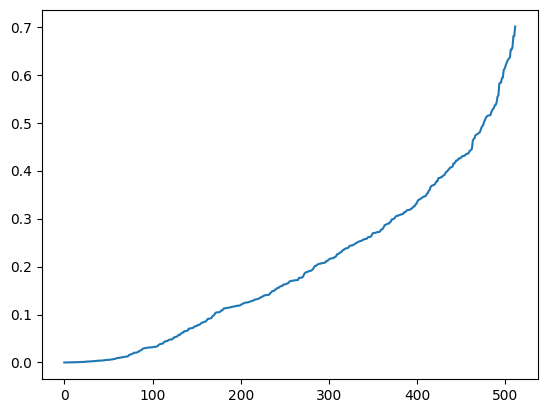

In [42]:
batch_size = 1
iterations = 512
losses = []

for i in range(iterations):
    with torch.no_grad():
        # print("batch_size:", batch_size)
        norm_params, freqs, ratios, indices = model.sample_fm_params(batch_size)
        x = model.input_synth(freqs, ratios, indices)
        predicted_params, norm_predicted_params = model(x)
        loss = F.mse_loss(norm_predicted_params, norm_params)
        losses.append(loss.item())
        # print("loss:", loss.item())
        # print()

print("batch_size:", batch_size)
print("mean loss:", np.mean(losses))
print("median loss:", np.median(losses))
print("max loss:", np.max(losses))
print("min loss:", np.min(losses))
from matplotlib import pyplot as plt
plt.plot(sorted(losses))
plt.show()

In [ ]:
model.max_harm_ratio, model.max_mod_idx

In [ ]:
def scale(x, in_low, in_high, out_low, out_high, exp: float=1.0):
    if in_low == in_high:
        return torch.ones_like(x) * out_high
    return torch.where(
        (x-in_low)/(in_high-in_low) == 0,
        out_low,
        torch.where(
            (x-in_low)/(in_high-in_low) > 0,
            out_low + (out_high-out_low) *
            ((x-in_low)/(in_high-in_low))**exp,
            out_low + (out_high-out_low) * -
            ((((-x+in_low)/(in_high-in_low)))**(exp))
        )
    )

In [ ]:
class ExportFMModel(nn.Module):
    def __init__(self, fm_lightning_model):
        super().__init__()
        self.max_harm_ratio = 6
        self.max_mod_idx = 6
        self.model = fm_lightning_model.model
        self.mel_spectrogram = MelSpectrogram(
            sample_rate=48000,
            n_fft=4096,
            f_min=midi2frequency(38),
            f_max=midi2frequency(86),
            n_mels=512,
            power=1.0,
            normalized=True,
        )

    def forward(self, x):
        in_wf = x.unsqueeze(1)
        # get the mel spectrogram
        in_spec = self.mel_spectrogram(in_wf)
        # normalize it
        in_spec = scale(in_spec, in_spec.min(), in_spec.max(), torch.tensor(0), torch.tensor(1))
        # predict the params
        norm_predicted_params = self.model(in_spec)
        # scale the predicted params
        predicted_params = self.scale_predicted_params(norm_predicted_params)
        return predicted_params
    

    def scale_predicted_params(self, predicted_params):
        # separate the param dim
        pitches = predicted_params[:, 0]
        ratios = predicted_params[:, 1]
        indices = predicted_params[:, 2]
        # clamp everything to 0..1
        pitches = torch.clamp(pitches, 0, 1)
        ratios = torch.clamp(ratios, 0, 1)
        indices = torch.clamp(indices, 0, 1)
        # scale to the correct range
        pitches = scale(pitches, torch.tensor(0), torch.tensor(1), torch.tensor(38), torch.tensor(86))
        freqs = midi2frequency(pitches)
        ratios = scale(ratios, torch.tensor(0), torch.tensor(1), torch.tensor(0), torch.tensor(self.max_harm_ratio))
        indices = scale(indices, torch.tensor(0), torch.tensor(1), torch.tensor(0), torch.tensor(self.max_mod_idx))
        # re-stack them
        out = torch.cat([freqs.unsqueeze(1), ratios.unsqueeze(1), indices.unsqueeze(1)], dim=1)
        return out#.unsqueeze(0)

In [ ]:
class ExportFMModelNNTilde(nn_tilde.Module):
    def __init__(self, fm_lightning_model):
        super().__init__()
        self.max_harm_ratio = 6
        self.max_mod_idx = 6
        self.model = fm_lightning_model.model
        self.mel_spectrogram = MelSpectrogram(
            sample_rate=48000,
            n_fft=4096,
            f_min=midi2frequency(38),
            f_max=midi2frequency(86),
            n_mels=512,
            power=1.0,
            normalized=True,
        )

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Carrier Frequency', '(signal) Modulation Ratio', '(signal) Modulation Index'],
        )

    def forward(self, x):
        # in_wf = x.unsqueeze(1)
        in_wf = x
        # in_wf = x.squeeze(0)
        # in_wf = torch.randn(1, 1, 12000)
        # get the mel spectrogram
        in_spec = self.mel_spectrogram(in_wf)
        # normalize it
        in_spec = scale(in_spec, in_spec.min(), in_spec.max(), torch.tensor(0), torch.tensor(1))
        # predict the params
        norm_predicted_params = self.model(in_spec)
        return torch.randn(x.shape[0], 3, x.shape[-1])
        # scale the predicted params
        predicted_params = self.scale_predicted_params(norm_predicted_params, buffer_size=8192)
        # return predicted_params
    

    def scale_predicted_params(self, predicted_params, buffer_size: int=8192):
        # separate the param dim
        pitches = predicted_params[:, 0]
        ratios = predicted_params[:, 1]
        indices = predicted_params[:, 2]
        # clamp everything to 0..1
        pitches = torch.clamp(pitches, 0, 1)
        ratios = torch.clamp(ratios, 0, 1)
        indices = torch.clamp(indices, 0, 1)
        # scale to the correct range
        pitches = scale(pitches, torch.tensor(0), torch.tensor(1), torch.tensor(38), torch.tensor(86))
        freqs = midi2frequency(pitches)
        ratios = scale(ratios, torch.tensor(0), torch.tensor(1), torch.tensor(0), torch.tensor(self.max_harm_ratio))
        indices = scale(indices, torch.tensor(0), torch.tensor(1), torch.tensor(0), torch.tensor(self.max_mod_idx))
        # repeat each for buffer size
        freqs = freqs.unsqueeze(1).repeat(1, buffer_size)
        ratios = ratios.unsqueeze(1).repeat(1, buffer_size)
        indices = indices.unsqueeze(1).repeat(1, buffer_size)
        # re-stack them
        # out = torch.cat([freqs.unsqueeze(1), ratios.unsqueeze(1), indices.unsqueeze(1)], dim=1)
        out = torch.stack([freqs, ratios, indices], dim=1)
        return out#.unsqueeze(0)

In [ ]:
class ExportFMModelNNTilde2(nn_tilde.Module):
    def __init__(self, model):
        super().__init__()
        self.max_harm_ratio = 6
        self.max_mod_idx = 6
        self.model = model
        self.model.mlp.eval()
        self.mel_spectrogram = MelSpectrogram(
            sample_rate=48000,
            n_fft=4096,
            f_min=midi2frequency(38),
            f_max=midi2frequency(86),
            n_mels=512,
            power=1.0,
            normalized=True,
        )

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Carrier Frequency', '(signal) Modulation Ratio', '(signal) Modulation Index'],
        )

    def forward(self, x):
        # in_wf = x.unsqueeze(1)
        in_wf = x
        # in_wf = x.squeeze(0)
        # in_wf = torch.randn(1, 1, 12000)
        # get the mel spectrogram
        in_spec = self.mel_spectrogram(in_wf)
        # normalize it
        in_spec = scale(in_spec, in_spec.min(), in_spec.max(), torch.tensor(0), torch.tensor(1))
        # predict the params
        norm_predicted_params = self.model(in_spec)
        return torch.randn(x.shape[0], 3, x.shape[-1])
        # scale the predicted params
        predicted_params = self.scale_predicted_params(norm_predicted_params, buffer_size=8192)
        # return predicted_params
    

    def scale_predicted_params(self, predicted_params, buffer_size: int=8192):
        # separate the param dim
        pitches = predicted_params[:, 0]
        ratios = predicted_params[:, 1]
        indices = predicted_params[:, 2]
        # clamp everything to 0..1
        pitches = torch.clamp(pitches, 0, 1)
        ratios = torch.clamp(ratios, 0, 1)
        indices = torch.clamp(indices, 0, 1)
        # scale to the correct range
        pitches = scale(pitches, torch.tensor(0), torch.tensor(1), torch.tensor(38), torch.tensor(86))
        freqs = midi2frequency(pitches)
        ratios = scale(ratios, torch.tensor(0), torch.tensor(1), torch.tensor(0), torch.tensor(self.max_harm_ratio))
        indices = scale(indices, torch.tensor(0), torch.tensor(1), torch.tensor(0), torch.tensor(self.max_mod_idx))
        # repeat each for buffer size
        freqs = freqs.unsqueeze(1).repeat(1, buffer_size)
        ratios = ratios.unsqueeze(1).repeat(1, buffer_size)
        indices = indices.unsqueeze(1).repeat(1, buffer_size)
        # re-stack them
        # out = torch.cat([freqs.unsqueeze(1), ratios.unsqueeze(1), indices.unsqueeze(1)], dim=1)
        out = torch.stack([freqs, ratios, indices], dim=1)
        return out#.unsqueeze(0)

# Test cases

## return randn

In [ ]:
class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        return torch.randn(x.shape[0], 3, x.shape[-1])

## one Linear layer

In [ ]:
class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Linear(128, 64)

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        fake_input = torch.randn(x.shape[0], 128)
        result = self.model(fake_input)
        return torch.randn(x.shape[0], 3, x.shape[-1])

## Suspect: 2 convs with 4-2-1

In [ ]:
from sonification.models.layers import ResBlock

class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        self.mel_spectrogram = MelSpectrogram(
            sample_rate=48000,
            n_fft=4096,
            f_min=midi2frequency(38),
            f_max=midi2frequency(86),
            n_mels=512,
            power=1.0,
            normalized=True,
        )

        self.lanes = nn.ModuleList()

        lane = [
            nn.Conv2d(1, 64, 4, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 128, 3, 1, 1),
        ]

        # add residual blocks
        # lane.extend([ResBlock(128, 64) for _ in range(24)])

        lane.append(nn.ReLU(inplace=True))

        self.lanes.append(nn.Sequential(*lane))

        self.model = nn.Sequential(*lane)

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        # fake_input = torch.randn(x.shape[0], 1, 512, 5)
        print("input shape:", x.shape)
        print("input", x)
        fake_input = self.mel_spectrogram(x)
        print("mel shape:", fake_input.shape)
        print("mel", fake_input)
        result = [lane(fake_input) for lane in self.lanes][0]
        print("result shape:", result.shape)
        print("result", result)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
class DummyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Linear(128, 64)

    def forward(self, x):
        fake_input = torch.randn(x.shape[0], 128)
        return self.model(fake_input)

class ExportTest(nn_tilde.Module):
    def __init__(self, dummy_net):
        super().__init__()

        self.model = dummy_net

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        fake_input = torch.randn(x.shape[0], 128)
        result = self.model(fake_input)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
from sonification.models.layers import MultiScaleEncoder

class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        self.model = MultiScaleEncoder(
            in_channel=1,
            channel=128,
            n_res_block=24,
            n_res_channel=128,
            stride=4,
            kernels=[4, 16],
            input_dim_h=512,
            input_dim_w=42,
        )

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        fake_input = torch.randn(x.shape[0], 1, 512, 42)
        result = self.model(fake_input)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
from sonification.models.layers import MultiScaleEncoder

class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        self.width = int(0.25 * 48000) // (4096 // 2) + 1

        self.encoder = MultiScaleEncoder(
            in_channel=1,
            channel=128,
            n_res_block=24,
            n_res_channel=128,
            stride=4,
            # kernels=[4, 16],
            kernels=[3, 3],
            input_dim_h=512,
            input_dim_w=self.width,
        )
        self.post_encoder = nn.Sequential(
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
        )

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        fake_input = torch.randn(x.shape[0], 1, 512, self.width)
        encoded = self.encoder(fake_input)
        result = self.post_encoder(encoded)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
from sonification.models.layers import MultiScaleEncoder

class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        self.width = int(0.25 * 48000) // (4096 // 2) + 1

        self.encoder = MultiScaleEncoder(
            in_channel=1,
            channel=128,
            n_res_block=24,
            n_res_channel=128,
            stride=4,
            # kernels=[4, 16],
            kernels=[3, 3],
            input_dim_h=512,
            input_dim_w=self.width,
        )
        self.encoder.eval()
        
        self.post_encoder = nn.Sequential(
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
        )
        self.post_encoder.eval()

        self.mlp = nn.Sequential(
            nn.Linear(128 * (128 // 64), 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 3),
            nn.Sigmoid()
        )
        self.mlp.eval()

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        fake_input = torch.randn(x.shape[0], 1, 512, self.width)
        result = self.encoder(fake_input)
        result = self.post_encoder(result)
        result = result.view(result.size(0), -1)
        result = self.mlp(result)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
from sonification.models.layers import ResBlock

class MultiScaleEncoder2(nn.Module):
    def __init__(
            self,
            in_channel=1,
            channel=128,
            n_res_block=1,
            n_res_channel=32,
            stride=4,
            kernels=[4, 4],
            input_dim_h=80,
            input_dim_w=188,
    ):
        super().__init__()

        # group kernels into pairs
        kernels = [kernels[i:i + 2] for i in range(0, len(kernels), 2)]

        # save input dimension for later use
        self.input_dim_h = input_dim_h
        self.input_dim_w = input_dim_w

        # create a list of lanes
        self.lanes = nn.ModuleList()

        # create a lane for each kernel size
        for kernel in kernels:
            padding = [kernel_side // 2 - 1 for kernel_side in kernel]
            lane = []

            # # base block: in -> out/2 -> out -> out
            # lane = [
            #     nn.Conv2d(in_channel, channel // 2, kernel,
            #                 stride=2, padding=padding),
            #     # nn.LeakyReLU(0.2, inplace=True),
            #     nn.Conv2d(channel // 2, channel, kernel,
            #                 stride=2, padding=padding),
            #     # nn.LeakyReLU(0.2, inplace=True),
            #     nn.Conv2d(channel, channel, 3, padding=1),
            # ]
            # base block: in -> out/2 -> out -> out
            lane = [
                nn.Conv2d(in_channel, channel // 2, 4, stride=2, padding=1),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Conv2d(channel // 2, channel, 3, stride=2, padding=1),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Conv2d(channel, channel, 3, padding=1),
            ]

            # add residual blocks
            lane.extend([ResBlock(channel, n_res_channel) for _ in range(n_res_block)])
            # lane.extend([ResBlock(channel // 2, n_res_channel) for _ in range(n_res_block)])

            # add final ReLU
            lane.append(nn.ReLU(inplace=True))

            # add to list of blocks
            self.lanes.append(nn.Sequential(*lane))

        # print(len(self.lanes))
    
    def forward(self, input):
        # Process all lanes and stack the results
        outputs = [lane(input) for lane in self.lanes]
        
        # Use torch's built-in sum function to add all outputs together
        if len(outputs) == 1:
            return outputs[0]
        else:
            return torch.stack(outputs).sum(dim=0)

In [ ]:
from sonification.models.layers import MultiScaleEncoder

class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        # self.width = int(0.25 * 48000) // (4096 // 2) + 1
        self.width = 8192 // (4096 // 2) + 1

        self.mel_spectrogram = MelSpectrogram(
            sample_rate=48000,
            n_fft=4096,
            f_min=midi2frequency(38),
            f_max=midi2frequency(86),
            n_mels=512,
            power=1.0,
            normalized=True,
        )
        self.mel_spectrogram.eval()

        self.encoder = MultiScaleEncoder2(
            in_channel=1,
            channel=128,
            # channel=1,
            n_res_block=24,
            n_res_channel=128,
            stride=4,
            kernels=[4, 16],
            input_dim_h=512,
            input_dim_w=self.width,
        )
        self.encoder.eval()
        
        self.post_encoder = nn.Sequential(
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
        )
        self.post_encoder.eval()

        self.mlp = nn.Sequential(
            nn.Linear(128 * (128 // 64), 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 3),
            nn.Sigmoid()
        )
        self.mlp.eval()

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        # print(x.shape)
        in_spec = self.mel_spectrogram(x)
        # print(in_spec.shape)
        # in_spec = torch.randn(x.shape[0], 1, 512, self.width)
        # in_spec = in_spec + torch.randn_like(in_spec)
        # normalize it
        in_spec = scale(in_spec, in_spec.min(), in_spec.max(), torch.tensor(0), torch.tensor(1))
        result = self.encoder(in_spec)
        # print(result.shape)
        # result = self.post_encoder(result)
        # result = result.view(result.size(0), -1)
        # result = self.mlp(result)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        # self.width = int(0.25 * 48000) // (4096 // 2) + 1
        self.width = 8192 // (4096 // 2) + 1

        self.mel_spectrogram = MelSpectrogram(
            sample_rate=48000,
            n_fft=4096,
            f_min=midi2frequency(38),
            f_max=midi2frequency(86),
            n_mels=512,
            power=1.0,
            normalized=True,
        )
        self.mel_spectrogram.eval()

        self.model = nn.Linear(512 * self.width, 3)

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        in_spec = self.mel_spectrogram(x)
        in_spec = in_spec.reshape(in_spec.size(0), -1)
        result = self.model(in_spec)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
from sonification.models.layers import ResBlock

class ExportTest(nn_tilde.Module):
    def __init__(self):
        super().__init__()

        # self.width = int(0.25 * 48000) // (4096 // 2) + 1
        self.width = 8192 // (4096 // 2) + 1
        self.n_res_block = 24

        self.mel_spectrogram = MelSpectrogram(
            sample_rate=48000,
            n_fft=4096,
            f_min=midi2frequency(38),
            f_max=midi2frequency(86),
            n_mels=512,
            power=1.0,
            normalized=True,
        )
        self.mel_spectrogram.eval()

        self.lanes = nn.ModuleList()
        for i in range(2):
            blocks = [ResBlock(1, 32) for _ in range(self.n_res_block)]
            self.lanes.append(nn.Sequential(*blocks))

        self.register_method(
            "forward",
            in_channels=1,
            in_ratio=1,
            out_channels=3,
            out_ratio=1,
            input_labels=['(signal) Channel 0'],
            output_labels=['(signal) Channel 0', '(signal) Channel 1', '(signal) Channel 3'],
        )

    def forward(self, x):
        in_spec = self.mel_spectrogram(x)
        lane_outputs = [lane(in_spec) for lane in self.lanes]
        if len(lane_outputs) == 1:
            outputs = lane_outputs[0]
        else:
            outputs = torch.stack(lane_outputs).sum(dim=0)
        return torch.randn(x.shape[0], 3, x.shape[-1])

In [ ]:
width = int(0.25 * 48000) // (4096 // 2) + 1
width

In [ ]:
import torch.nn.functional as F

F.mse_loss(torch.rand(512, 3), torch.randn(512, 3))

In [ ]:
a = torch.tensor([0.5, 0.1, 0.9])
b = torch.tensor([0.5, 0.0, 0.0])
F.mse_loss(a, b)

In [ ]:
def scale_predicted_params(predicted_params):
    # separate the param dim
    pitches = predicted_params[:, 0]
    ratios = predicted_params[:, 1]
    indices = predicted_params[:, 2]
    # clamp everything to 0..1
    pitches = torch.clamp(pitches, 0, 1)
    ratios = torch.clamp(ratios, 0, 1)
    indices = torch.clamp(indices, 0, 1)
    # scale to the correct range
    pitches = scale(pitches, 0, 1, 38, 86)
    freqs = midi2frequency(pitches)
    ratios = scale(ratios, 0, 1, 0, 6)
    indices = scale(indices, 0, 1, 0, 6)
    # re-stack them
    out = torch.cat([freqs.unsqueeze(1), ratios.unsqueeze(1), indices.unsqueeze(1)], dim=1)
    return out

In [ ]:
a = torch.tensor([0.5, 0.01, 0.009])
scale_predicted_params(a.unsqueeze(0))

In [ ]:
test_mel_spectrogram = MelSpectrogram(
    sample_rate=48000,
    n_fft=4096,
    f_min=midi2frequency(38),
    f_max=midi2frequency(86),
    n_mels=512,
    power=1.0,
    normalized=True,
)
dummy_input = torch.randn(1, 1, 12000)
test_input = test_mel_spectrogram(dummy_input)
print(test_input.shape)

In [ ]:
dummy_input = torch.randn(1, model.n_samples).to(device)
export_fm_model = ExportFMModel(model)
export_fm_model.eval()
traced_model = torch.jit.script(export_fm_model, dummy_input)
traced_model.save("fmparams_script.ts")

In [ ]:
dummy_input = torch.randn(1, model.n_samples).to(device)
export_fm_model = ExportFMModel(model)
export_fm_model.eval()
traced_model = torch.jit.trace(export_fm_model, dummy_input)
traced_model.save("fmparams_trace.ts")

In [ ]:
dummy_input = torch.randn(1, 1, 8192).to(device)
# export_fm_model = ExportFMModelNNTilde(model)
export_fm_model = ExportFMModelNNTilde2(model2)
export_fm_model.export_to_ts("fmparams_nn_tilde.ts", dummy_input)

In [ ]:
dummy_input = torch.randn(1, 1, 8192).to(device)
export_fm_model = ExportFMModelNNTilde(model)
export_fm_model.export_to_ts_trace("fmparams_nn_tilde_trace.ts", dummy_input)

# Export test

In [ ]:
dummy_input = torch.randn(1, 1, 8192).to(device)
export_test_model = ExportTest()
export_test_model.eval()
export_test_model(dummy_input)

In [ ]:
dummy_input = torch.randn(1, 1, 8192).to(device)
# dummy_net = DummyNet()
# export_test_model = ExportTest(dummy_net)
export_test_model = ExportTest()
export_test_model.eval()
export_test_model.export_to_ts("exporttest_script.ts", dummy_input)

# Load test

In [ ]:
loaded_model = torch.jit.load("fmparams_script.ts")
# print(loaded_model)
print(loaded_model.code)

In [ ]:
dummy_input = torch.randn(1, 12000)
preds = loaded_model(dummy_input)
print(preds.shape)
print(preds)

In [ ]:
loaded_model = torch.jit.load("fmparams_trace.ts")
# print(loaded_model)
print(loaded_model.code)

In [ ]:
dummy_input = torch.randn(1, 12000)
preds = loaded_model(dummy_input)
print(preds.shape)
print(preds)

In [ ]:
loaded_model = torch.jit.load("fmparams_nn_tilde.ts")
# print(loaded_model)
print(loaded_model.code)

In [ ]:
loaded_model = torch.jit.load("fmparams_nn_tilde_trace.ts")
# print(loaded_model)
print(loaded_model.code)

In [ ]:
dummy_input = torch.randn(1, 1, 8192)
preds = loaded_model(dummy_input)
print(preds.shape)

In [ ]:
print(torch.sum(preds))

In [ ]:
print(preds)